In [1]:

import matplotlib.pyplot as plt
import numpy as np
import torch

import pyro
import pyro.infer
import pyro.optim
import pyro.distributions as dist

pyro.set_rng_seed(101)

In [36]:
def scale(guess):
    weight = pyro.sample("weight", dist.Normal(guess, 1.0))
    return pyro.sample("measurement", dist.Normal(weight, 0.75))

In [43]:
scale(8.5)

tensor(8.1646)

In [25]:
torch.tensor(0.3).numpy()

array(0.3, dtype=float32)

(array([  3.,  10.,  45., 127., 177., 239., 220., 122.,  47.,  10.]),
 array([ 96.39531 ,  97.03778 ,  97.68025 ,  98.32272 ,  98.965195,
         99.607666, 100.250145, 100.89262 , 101.53509 , 102.17756 ,
        102.82003 ], dtype=float32),
 <a list of 10 Patch objects>)

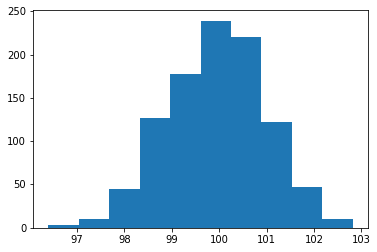

In [21]:
plt.hist([pyro.sample("weight", dist.Normal(100, 1.0)).numpy() for i in range(1000)])

In [26]:
conditioned_scale = pyro.condition(scale, data={"measurement": 9.5})

In [28]:
type(conditioned_scale)

pyro.poutine.messenger._bound_partial

In [33]:
def deferred_conditioned_scale(measurement, guess):
    return pyro.condition(scale, data={"measurement": measurement})(guess)

In [35]:
deferred_conditioned_scale(9.5, 8.5)
# you guess 8.5, but measured to be 9.5. after you condition to the measurement, your get 9.5

9.5

In [31]:
def scale_obs(guess):  # equivalent to conditioned_scale above
    weight = pyro.sample("weight", dist.Normal(guess, 1.))
     # here we condition on measurement == 9.5
    return pyro.sample("measurement", dist.Normal(weight, 0.75), obs=9.5)

In [32]:
scale_obs(8.5)

/projects/da_workspace/software/miniconda/envs/pyro/lib/python3.7/site-packages/pyro/primitives.py:86: RuntimeWarning: trying to observe a value outside of inference at measurement
  RuntimeWarning)


9.5

In [44]:
def perfect_guide(guess):
    loc =(0.75**2 * guess + 9.5) / (1 + 0.75**2) # 9.14
    scale = np.sqrt(0.75**2/(1 + 0.75**2)) # 0.6
    return pyro.sample("weight", dist.Normal(loc, scale))

In [52]:
perfect_guide(8.5)

tensor(8.5439)

In [55]:
simple_param_store = {}
a = simple_param_store.setdefault("a", torch.randn(1))

In [56]:
simple_param_store['a']

tensor([0.3298])

In [58]:
a

tensor([0.3298])

In [63]:
def scale_parametrized_guide(guess):
    a = pyro.param("a", torch.tensor(guess))
    b = pyro.param("b", torch.tensor(1.))
    print(a, b)
    return pyro.sample("weight", dist.Normal(a, torch.abs(b)))

In [64]:
scale_parametrized_guide(8.5)

tensor(8.5000, requires_grad=True) tensor(1., requires_grad=True)


tensor(8.3112, grad_fn=<AddBackward0>)

In [65]:
from torch.distributions import constraints

def scale_parametrized_guide_constrained(guess):
    a = pyro.param("a", torch.tensor(guess))
    b = pyro.param("b", torch.tensor(1.), constraint=constraints.positive)
    return pyro.sample("weight", dist.Normal(a, b))  # no more torch.abs

In [66]:
scale_parametrized_guide_constrained(8.5)

tensor(9.5340, grad_fn=<AddBackward0>)

tensor(8.5000, requires_grad=True) tensor(1., requires_grad=True)
tensor(8.5020, requires_grad=True) tensor(1.0008, requires_grad=True)
tensor(8.5006, requires_grad=True) tensor(1.0000, requires_grad=True)
tensor(8.4996, requires_grad=True) tensor(1.0000, requires_grad=True)
tensor(8.5019, requires_grad=True) tensor(1.0004, requires_grad=True)
tensor(8.5022, requires_grad=True) tensor(1.0015, requires_grad=True)
tensor(8.5088, requires_grad=True) tensor(0.9915, requires_grad=True)
tensor(8.5103, requires_grad=True) tensor(0.9918, requires_grad=True)
tensor(8.5107, requires_grad=True) tensor(0.9930, requires_grad=True)
tensor(8.5122, requires_grad=True) tensor(0.9942, requires_grad=True)
tensor(8.5159, requires_grad=True) tensor(0.9931, requires_grad=True)
tensor(8.5167, requires_grad=True) tensor(0.9942, requires_grad=True)
tensor(8.5197, requires_grad=True) tensor(0.9941, requires_grad=True)
tensor(8.5216, requires_grad=True) tensor(0.9952, requires_grad=True)
tensor(8.5241, requires_

tensor(8.7540, requires_grad=True) tensor(0.7442, requires_grad=True)
tensor(8.7568, requires_grad=True) tensor(0.7432, requires_grad=True)
tensor(8.7550, requires_grad=True) tensor(0.7411, requires_grad=True)
tensor(8.7567, requires_grad=True) tensor(0.7415, requires_grad=True)
tensor(8.7585, requires_grad=True) tensor(0.7423, requires_grad=True)
tensor(8.7592, requires_grad=True) tensor(0.7439, requires_grad=True)
tensor(8.7644, requires_grad=True) tensor(0.7350, requires_grad=True)
tensor(8.7649, requires_grad=True) tensor(0.7354, requires_grad=True)
tensor(8.7654, requires_grad=True) tensor(0.7369, requires_grad=True)
tensor(8.7675, requires_grad=True) tensor(0.7374, requires_grad=True)
tensor(8.7695, requires_grad=True) tensor(0.7381, requires_grad=True)
tensor(8.7740, requires_grad=True) tensor(0.7328, requires_grad=True)
tensor(8.7757, requires_grad=True) tensor(0.7335, requires_grad=True)
tensor(8.7772, requires_grad=True) tensor(0.7347, requires_grad=True)
tensor(8.7783, requi

tensor(8.8854, requires_grad=True) tensor(0.7252, requires_grad=True)
tensor(8.8852, requires_grad=True) tensor(0.7264, requires_grad=True)
tensor(8.8864, requires_grad=True) tensor(0.7275, requires_grad=True)
tensor(8.8906, requires_grad=True) tensor(0.7224, requires_grad=True)
tensor(8.8883, requires_grad=True) tensor(0.7189, requires_grad=True)
tensor(8.8886, requires_grad=True) tensor(0.7200, requires_grad=True)
tensor(8.8899, requires_grad=True) tensor(0.7210, requires_grad=True)
tensor(8.8925, requires_grad=True) tensor(0.7205, requires_grad=True)
tensor(8.8936, requires_grad=True) tensor(0.7217, requires_grad=True)
tensor(8.8922, requires_grad=True) tensor(0.7215, requires_grad=True)
tensor(8.8950, requires_grad=True) tensor(0.7197, requires_grad=True)
tensor(8.8959, requires_grad=True) tensor(0.7209, requires_grad=True)
tensor(8.8974, requires_grad=True) tensor(0.7219, requires_grad=True)
tensor(8.8975, requires_grad=True) tensor(0.7234, requires_grad=True)
tensor(8.8956, requi

tensor(8.9701, requires_grad=True) tensor(0.6903, requires_grad=True)
tensor(8.9711, requires_grad=True) tensor(0.6915, requires_grad=True)
tensor(8.9705, requires_grad=True) tensor(0.6927, requires_grad=True)
tensor(8.9706, requires_grad=True) tensor(0.6943, requires_grad=True)
tensor(8.9731, requires_grad=True) tensor(0.6932, requires_grad=True)
tensor(8.9726, requires_grad=True) tensor(0.6941, requires_grad=True)
tensor(8.9747, requires_grad=True) tensor(0.6937, requires_grad=True)
tensor(8.9757, requires_grad=True) tensor(0.6950, requires_grad=True)
tensor(8.9754, requires_grad=True) tensor(0.6965, requires_grad=True)
tensor(8.9765, requires_grad=True) tensor(0.6977, requires_grad=True)
tensor(8.9776, requires_grad=True) tensor(0.6990, requires_grad=True)
tensor(8.9804, requires_grad=True) tensor(0.6973, requires_grad=True)
tensor(8.9796, requires_grad=True) tensor(0.6977, requires_grad=True)
tensor(8.9760, requires_grad=True) tensor(0.6919, requires_grad=True)
tensor(8.9799, requi

tensor(9.0513, requires_grad=True) tensor(0.6190, requires_grad=True)
tensor(9.0496, requires_grad=True) tensor(0.6190, requires_grad=True)
tensor(9.0490, requires_grad=True) tensor(0.6204, requires_grad=True)
tensor(9.0470, requires_grad=True) tensor(0.6197, requires_grad=True)
tensor(9.0449, requires_grad=True) tensor(0.6188, requires_grad=True)
tensor(9.0444, requires_grad=True) tensor(0.6203, requires_grad=True)
tensor(9.0477, requires_grad=True) tensor(0.6161, requires_grad=True)
tensor(9.0476, requires_grad=True) tensor(0.6172, requires_grad=True)
tensor(9.0460, requires_grad=True) tensor(0.6172, requires_grad=True)
tensor(9.0438, requires_grad=True) tensor(0.6162, requires_grad=True)
tensor(9.0417, requires_grad=True) tensor(0.6152, requires_grad=True)
tensor(9.0442, requires_grad=True) tensor(0.6127, requires_grad=True)
tensor(9.0468, requires_grad=True) tensor(0.6113, requires_grad=True)
tensor(9.0505, requires_grad=True) tensor(0.6065, requires_grad=True)
tensor(9.0517, requi

tensor(9.0774, requires_grad=True) tensor(0.5868, requires_grad=True)
tensor(9.0756, requires_grad=True) tensor(0.5865, requires_grad=True)
tensor(9.0768, requires_grad=True) tensor(0.5872, requires_grad=True)
tensor(9.0774, requires_grad=True) tensor(0.5889, requires_grad=True)
tensor(9.0765, requires_grad=True) tensor(0.5900, requires_grad=True)
tensor(9.0776, requires_grad=True) tensor(0.5910, requires_grad=True)
tensor(9.0766, requires_grad=True) tensor(0.5919, requires_grad=True)
tensor(9.0755, requires_grad=True) tensor(0.5928, requires_grad=True)
tensor(9.0751, requires_grad=True) tensor(0.5946, requires_grad=True)
tensor(9.0778, requires_grad=True) tensor(0.5923, requires_grad=True)
tensor(9.0801, requires_grad=True) tensor(0.5915, requires_grad=True)
tensor(9.0772, requires_grad=True) tensor(0.5870, requires_grad=True)
tensor(9.0773, requires_grad=True) tensor(0.5882, requires_grad=True)
tensor(9.0786, requires_grad=True) tensor(0.5890, requires_grad=True)
tensor(9.0779, requi

tensor(9.1037, requires_grad=True) tensor(0.6021, requires_grad=True)
tensor(9.1011, requires_grad=True) tensor(0.5993, requires_grad=True)
tensor(9.1007, requires_grad=True) tensor(0.6006, requires_grad=True)
tensor(9.1005, requires_grad=True) tensor(0.6024, requires_grad=True)
tensor(9.0993, requires_grad=True) tensor(0.6033, requires_grad=True)
tensor(9.1009, requires_grad=True) tensor(0.6034, requires_grad=True)
tensor(9.1007, requires_grad=True) tensor(0.6050, requires_grad=True)
tensor(9.0995, requires_grad=True) tensor(0.6059, requires_grad=True)
tensor(9.1022, requires_grad=True) tensor(0.6033, requires_grad=True)
tensor(9.1004, requires_grad=True) tensor(0.6021, requires_grad=True)
tensor(9.1003, requires_grad=True) tensor(0.6037, requires_grad=True)
tensor(9.0985, requires_grad=True) tensor(0.6036, requires_grad=True)
tensor(9.0980, requires_grad=True) tensor(0.6051, requires_grad=True)
tensor(9.0946, requires_grad=True) tensor(0.6003, requires_grad=True)
tensor(9.0925, requi

tensor(9.1565, requires_grad=True) tensor(0.6083, requires_grad=True)
tensor(9.1537, requires_grad=True) tensor(0.6058, requires_grad=True)
tensor(9.1512, requires_grad=True) tensor(0.6044, requires_grad=True)
tensor(9.1511, requires_grad=True) tensor(0.6059, requires_grad=True)
tensor(9.1486, requires_grad=True) tensor(0.6040, requires_grad=True)
tensor(9.1468, requires_grad=True) tensor(0.6041, requires_grad=True)
tensor(9.1468, requires_grad=True) tensor(0.6057, requires_grad=True)
tensor(9.1467, requires_grad=True) tensor(0.6075, requires_grad=True)
tensor(9.1457, requires_grad=True) tensor(0.6087, requires_grad=True)
tensor(9.1450, requires_grad=True) tensor(0.6102, requires_grad=True)
tensor(9.1478, requires_grad=True) tensor(0.6070, requires_grad=True)
tensor(9.1501, requires_grad=True) tensor(0.6058, requires_grad=True)
tensor(9.1517, requires_grad=True) tensor(0.6062, requires_grad=True)
tensor(9.1529, requires_grad=True) tensor(0.6072, requires_grad=True)
tensor(9.1510, requi

tensor(9.1509, requires_grad=True) tensor(0.6258, requires_grad=True)
tensor(9.1519, requires_grad=True) tensor(0.6268, requires_grad=True)
tensor(9.1513, requires_grad=True) tensor(0.6282, requires_grad=True)
tensor(9.1526, requires_grad=True) tensor(0.6288, requires_grad=True)
tensor(9.1552, requires_grad=True) tensor(0.6270, requires_grad=True)
tensor(9.1566, requires_grad=True) tensor(0.6277, requires_grad=True)
tensor(9.1563, requires_grad=True) tensor(0.6293, requires_grad=True)
tensor(9.1569, requires_grad=True) tensor(0.6308, requires_grad=True)
tensor(9.1591, requires_grad=True) tensor(0.6299, requires_grad=True)
tensor(9.1608, requires_grad=True) tensor(0.6301, requires_grad=True)
tensor(9.1597, requires_grad=True) tensor(0.6309, requires_grad=True)
tensor(9.1569, requires_grad=True) tensor(0.6285, requires_grad=True)
tensor(9.1546, requires_grad=True) tensor(0.6275, requires_grad=True)
tensor(9.1560, requires_grad=True) tensor(0.6275, requires_grad=True)
tensor(9.1551, requi

tensor(9.1579, requires_grad=True) tensor(0.5901, requires_grad=True)
tensor(9.1572, requires_grad=True) tensor(0.5917, requires_grad=True)
tensor(9.1585, requires_grad=True) tensor(0.5925, requires_grad=True)
tensor(9.1602, requires_grad=True) tensor(0.5927, requires_grad=True)
tensor(9.1608, requires_grad=True) tensor(0.5943, requires_grad=True)
tensor(9.1633, requires_grad=True) tensor(0.5924, requires_grad=True)
tensor(9.1640, requires_grad=True) tensor(0.5938, requires_grad=True)
tensor(9.1651, requires_grad=True) tensor(0.5949, requires_grad=True)
tensor(9.1679, requires_grad=True) tensor(0.5924, requires_grad=True)
tensor(9.1703, requires_grad=True) tensor(0.5909, requires_grad=True)
tensor(9.1660, requires_grad=True) tensor(0.5803, requires_grad=True)
tensor(9.1648, requires_grad=True) tensor(0.5806, requires_grad=True)
tensor(9.1620, requires_grad=True) tensor(0.5778, requires_grad=True)
tensor(9.1598, requires_grad=True) tensor(0.5772, requires_grad=True)
tensor(9.1582, requi

tensor(9.1427, requires_grad=True) tensor(0.5943, requires_grad=True)
tensor(9.1429, requires_grad=True) tensor(0.5957, requires_grad=True)
tensor(9.1411, requires_grad=True) tensor(0.5954, requires_grad=True)
tensor(9.1404, requires_grad=True) tensor(0.5969, requires_grad=True)
tensor(9.1373, requires_grad=True) tensor(0.5930, requires_grad=True)
tensor(9.1360, requires_grad=True) tensor(0.5937, requires_grad=True)
tensor(9.1366, requires_grad=True) tensor(0.5952, requires_grad=True)
tensor(9.1348, requires_grad=True) tensor(0.5950, requires_grad=True)
tensor(9.1360, requires_grad=True) tensor(0.5956, requires_grad=True)
tensor(9.1348, requires_grad=True) tensor(0.5964, requires_grad=True)
tensor(9.1373, requires_grad=True) tensor(0.5941, requires_grad=True)
tensor(9.1390, requires_grad=True) tensor(0.5943, requires_grad=True)
tensor(9.1420, requires_grad=True) tensor(0.5913, requires_grad=True)
tensor(9.1419, requires_grad=True) tensor(0.5925, requires_grad=True)
tensor(9.1418, requi

tensor(9.1449, requires_grad=True) tensor(0.5791, requires_grad=True)
tensor(9.1467, requires_grad=True) tensor(0.5792, requires_grad=True)
tensor(9.1459, requires_grad=True) tensor(0.5803, requires_grad=True)
tensor(9.1457, requires_grad=True) tensor(0.5821, requires_grad=True)
tensor(9.1432, requires_grad=True) tensor(0.5801, requires_grad=True)
tensor(9.1414, requires_grad=True) tensor(0.5802, requires_grad=True)
tensor(9.1400, requires_grad=True) tensor(0.5810, requires_grad=True)
tensor(9.1408, requires_grad=True) tensor(0.5822, requires_grad=True)
tensor(9.1438, requires_grad=True) tensor(0.5790, requires_grad=True)
tensor(9.1474, requires_grad=True) tensor(0.5735, requires_grad=True)
tensor(9.1462, requires_grad=True) tensor(0.5731, requires_grad=True)
tensor(9.1443, requires_grad=True) tensor(0.5729, requires_grad=True)
tensor(9.1441, requires_grad=True) tensor(0.5746, requires_grad=True)
tensor(9.1429, requires_grad=True) tensor(0.5757, requires_grad=True)
tensor(9.1423, requi

tensor(9.1059, requires_grad=True) tensor(0.5842, requires_grad=True)
tensor(9.1068, requires_grad=True) tensor(0.5855, requires_grad=True)
tensor(9.1052, requires_grad=True) tensor(0.5855, requires_grad=True)
tensor(9.1073, requires_grad=True) tensor(0.5842, requires_grad=True)
tensor(9.1058, requires_grad=True) tensor(0.5839, requires_grad=True)
tensor(9.1062, requires_grad=True) tensor(0.5854, requires_grad=True)
tensor(9.1063, requires_grad=True) tensor(0.5873, requires_grad=True)
tensor(9.1077, requires_grad=True) tensor(0.5882, requires_grad=True)
tensor(9.1063, requires_grad=True) tensor(0.5885, requires_grad=True)
tensor(9.1064, requires_grad=True) tensor(0.5902, requires_grad=True)
tensor(9.1061, requires_grad=True) tensor(0.5920, requires_grad=True)
tensor(9.1044, requires_grad=True) tensor(0.5920, requires_grad=True)
tensor(9.1018, requires_grad=True) tensor(0.5899, requires_grad=True)
tensor(9.1015, requires_grad=True) tensor(0.5914, requires_grad=True)
tensor(9.1011, requi

tensor(9.1037, requires_grad=True) tensor(0.5985, requires_grad=True)
tensor(9.1078, requires_grad=True) tensor(0.5908, requires_grad=True)
tensor(9.1088, requires_grad=True) tensor(0.5915, requires_grad=True)
tensor(9.1071, requires_grad=True) tensor(0.5911, requires_grad=True)
tensor(9.1070, requires_grad=True) tensor(0.5928, requires_grad=True)
tensor(9.1086, requires_grad=True) tensor(0.5931, requires_grad=True)
tensor(9.1088, requires_grad=True) tensor(0.5949, requires_grad=True)
tensor(9.1067, requires_grad=True) tensor(0.5939, requires_grad=True)
tensor(9.1043, requires_grad=True) tensor(0.5924, requires_grad=True)
tensor(9.1062, requires_grad=True) tensor(0.5914, requires_grad=True)
tensor(9.1046, requires_grad=True) tensor(0.5910, requires_grad=True)
tensor(9.1063, requires_grad=True) tensor(0.5906, requires_grad=True)
tensor(9.1085, requires_grad=True) tensor(0.5900, requires_grad=True)
tensor(9.1094, requires_grad=True) tensor(0.5914, requires_grad=True)
tensor(9.1108, requi

tensor(9.1110, requires_grad=True) tensor(0.6051, requires_grad=True)
tensor(9.1132, requires_grad=True) tensor(0.6037, requires_grad=True)
tensor(9.1162, requires_grad=True) tensor(0.6008, requires_grad=True)
tensor(9.1166, requires_grad=True) tensor(0.6021, requires_grad=True)
tensor(9.1158, requires_grad=True) tensor(0.6034, requires_grad=True)
tensor(9.1159, requires_grad=True) tensor(0.6052, requires_grad=True)
tensor(9.1149, requires_grad=True) tensor(0.6063, requires_grad=True)
tensor(9.1129, requires_grad=True) tensor(0.6060, requires_grad=True)
tensor(9.1147, requires_grad=True) tensor(0.6053, requires_grad=True)
tensor(9.1106, requires_grad=True) tensor(0.5960, requires_grad=True)
tensor(9.1130, requires_grad=True) tensor(0.5920, requires_grad=True)
tensor(9.1115, requires_grad=True) tensor(0.5912, requires_grad=True)
tensor(9.1107, requires_grad=True) tensor(0.5926, requires_grad=True)
tensor(9.1109, requires_grad=True) tensor(0.5944, requires_grad=True)
tensor(9.1106, requi

tensor(9.1299, requires_grad=True) tensor(0.5868, requires_grad=True)
tensor(9.1301, requires_grad=True) tensor(0.5879, requires_grad=True)
tensor(9.1292, requires_grad=True) tensor(0.5892, requires_grad=True)
tensor(9.1275, requires_grad=True) tensor(0.5893, requires_grad=True)
tensor(9.1255, requires_grad=True) tensor(0.5890, requires_grad=True)
tensor(9.1268, requires_grad=True) tensor(0.5894, requires_grad=True)
tensor(9.1319, requires_grad=True) tensor(0.5759, requires_grad=True)
tensor(9.1318, requires_grad=True) tensor(0.5760, requires_grad=True)
tensor(9.1290, requires_grad=True) tensor(0.5727, requires_grad=True)
tensor(9.1288, requires_grad=True) tensor(0.5741, requires_grad=True)
tensor(9.1294, requires_grad=True) tensor(0.5758, requires_grad=True)
tensor(9.1320, requires_grad=True) tensor(0.5734, requires_grad=True)
tensor(9.1338, requires_grad=True) tensor(0.5736, requires_grad=True)
tensor(9.1351, requires_grad=True) tensor(0.5745, requires_grad=True)
tensor(9.1365, requi

tensor(9.1441, requires_grad=True) tensor(0.6185, requires_grad=True)
tensor(9.1451, requires_grad=True) tensor(0.6198, requires_grad=True)
tensor(9.1478, requires_grad=True) tensor(0.6177, requires_grad=True)
tensor(9.1486, requires_grad=True) tensor(0.6189, requires_grad=True)
tensor(9.1487, requires_grad=True) tensor(0.6206, requires_grad=True)
tensor(9.1511, requires_grad=True) tensor(0.6191, requires_grad=True)
tensor(9.1494, requires_grad=True) tensor(0.6184, requires_grad=True)
tensor(9.1492, requires_grad=True) tensor(0.6200, requires_grad=True)
tensor(9.1475, requires_grad=True) tensor(0.6202, requires_grad=True)
tensor(9.1475, requires_grad=True) tensor(0.6218, requires_grad=True)
tensor(9.1476, requires_grad=True) tensor(0.6236, requires_grad=True)
tensor(9.1471, requires_grad=True) tensor(0.6253, requires_grad=True)
tensor(9.1470, requires_grad=True) tensor(0.6270, requires_grad=True)
tensor(9.1479, requires_grad=True) tensor(0.6284, requires_grad=True)
tensor(9.1477, requi

tensor(9.1530, requires_grad=True) tensor(0.6229, requires_grad=True)
tensor(9.1520, requires_grad=True) tensor(0.6238, requires_grad=True)
tensor(9.1530, requires_grad=True) tensor(0.6248, requires_grad=True)
tensor(9.1520, requires_grad=True) tensor(0.6258, requires_grad=True)
tensor(9.1521, requires_grad=True) tensor(0.6275, requires_grad=True)
tensor(9.1469, requires_grad=True) tensor(0.6139, requires_grad=True)
tensor(9.1450, requires_grad=True) tensor(0.6131, requires_grad=True)
tensor(9.1439, requires_grad=True) tensor(0.6141, requires_grad=True)
tensor(9.1430, requires_grad=True) tensor(0.6155, requires_grad=True)
tensor(9.1425, requires_grad=True) tensor(0.6172, requires_grad=True)
tensor(9.1417, requires_grad=True) tensor(0.6186, requires_grad=True)
tensor(9.1408, requires_grad=True) tensor(0.6200, requires_grad=True)
tensor(9.1408, requires_grad=True) tensor(0.6218, requires_grad=True)
tensor(9.1401, requires_grad=True) tensor(0.6233, requires_grad=True)
tensor(9.1399, requi

tensor(9.1534, requires_grad=True) tensor(0.6599, requires_grad=True)
tensor(9.1507, requires_grad=True) tensor(0.6569, requires_grad=True)
tensor(9.1507, requires_grad=True) tensor(0.6581, requires_grad=True)
tensor(9.1514, requires_grad=True) tensor(0.6594, requires_grad=True)
tensor(9.1511, requires_grad=True) tensor(0.6610, requires_grad=True)
tensor(9.1505, requires_grad=True) tensor(0.6625, requires_grad=True)
tensor(9.1514, requires_grad=True) tensor(0.6636, requires_grad=True)
tensor(9.1540, requires_grad=True) tensor(0.6617, requires_grad=True)
tensor(9.1564, requires_grad=True) tensor(0.6604, requires_grad=True)
tensor(9.1568, requires_grad=True) tensor(0.6618, requires_grad=True)
tensor(9.1552, requires_grad=True) tensor(0.6620, requires_grad=True)
tensor(9.1576, requires_grad=True) tensor(0.6600, requires_grad=True)
tensor(9.1594, requires_grad=True) tensor(0.6599, requires_grad=True)
tensor(9.1593, requires_grad=True) tensor(0.6614, requires_grad=True)
tensor(9.1578, requi

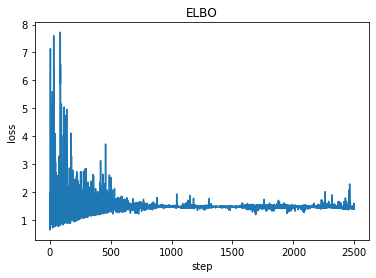

In [68]:
guess = 8.5
pyro.clear_param_store()
svi = pyro.infer.SVI(model=conditioned_scale,
                     guide=scale_parametrized_guide,
                     optim=pyro.optim.SGD({"lr": 0.001, "momentum":0.1}),
                     loss=pyro.infer.Trace_ELBO())


losses, a, b  = [], [], []
num_steps = 2500
for t in range(num_steps):
    losses.append(svi.step(guess))
    a.append(pyro.param("a").item())
    b.append(pyro.param("b").item())

plt.plot(losses)
plt.title("ELBO")
plt.xlabel("step")
plt.ylabel("loss");
print('a = ',pyro.param("a").item())
print('b = ', pyro.param("b").item())

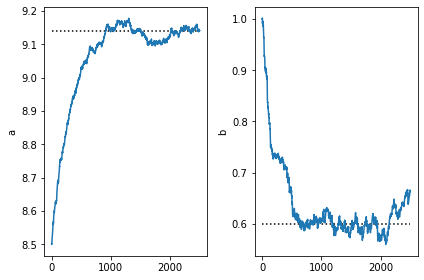

In [69]:

plt.subplot(1,2,1)
plt.plot([0,num_steps],[9.14,9.14], 'k:')
plt.plot(a)
plt.ylabel('a')

plt.subplot(1,2,2)
plt.ylabel('b')
plt.plot([0,num_steps],[0.6,0.6], 'k:')
plt.plot(b)
plt.tight_layout()